In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [24]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [25]:
classes[9]

'truck'

In [26]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

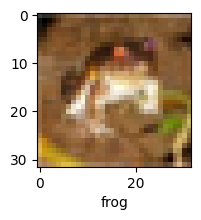

In [27]:
plot_sample(X_train, y_train, 0)

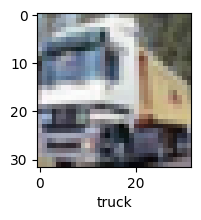

In [28]:
plot_sample(X_train, y_train, 1)

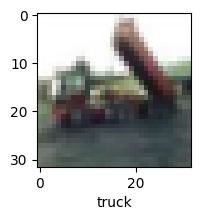

In [29]:
plot_sample(X_train, y_train, 2)

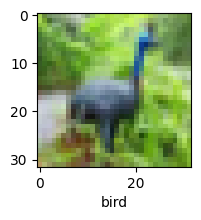

In [30]:
plot_sample(X_train, y_train, 6)

In [33]:
X_train = X_train / 255
X_test = X_test / 255

In [36]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.3034 - loss: 1.9334
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.4203 - loss: 1.6420
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.4533 - loss: 1.5518
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.4741 - loss: 1.4914
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.4908 - loss: 1.4393


In [37]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4150 - loss: 1.7005


[1.697950839996338, 0.4146000146865845]

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classificatoin Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classificatoin Report: 
               precision    recall  f1-score   support

           0       0.51      0.55      0.53      1000
           1       0.27      0.87      0.42      1000
           2       0.46      0.22      0.30      1000
           3       0.41      0.19      0.26      1000
           4       0.49      0.29      0.37      1000
           5       0.45      0.29      0.35      1000
           6       0.62      0.36      0.46      1000
           7       0.43      0.58      0.49      1000
           8       0.76      0.30      0.43      1000
           9       0.40      0.51      0.45      1000

    accuracy                           0.41     10000
   macro avg       0.48      0.41      0.40     10000
weighted avg       0.48      0.41      0.40     10000



In [44]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [49]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [50]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3596 - loss: 1.7473
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5613 - loss: 1.2462
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6179 - loss: 1.0908
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6498 - loss: 1.0072
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6762 - loss: 0.9322
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6915 - loss: 0.8901
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7067 - loss: 0.8452
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7159 - loss: 0.8158
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7286 - loss: 0.7789
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7390 - loss: 0.7508


In [51]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6872 - loss: 0.9185


[0.922934889793396, 0.6866000294685364]

In [52]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

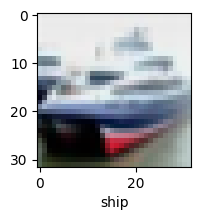

In [53]:
plot_sample(X_test, y_test, 1)

In [54]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[3.87501568e-02, 1.37474679e-04, 2.07825322e-02, 5.64582527e-01,
        5.92187187e-03, 4.70540561e-02, 1.97148561e-01, 4.68762184e-04,
        1.17599055e-01, 7.55499443e-03],
       [8.15093294e-02, 6.48105562e-01, 7.04063177e-06, 8.35445064e-07,
        1.78800183e-05, 1.97282173e-08, 7.09094422e-07, 1.92294394e-07,
        2.60802954e-01, 9.55543295e-03],
       [2.05995634e-01, 1.94295615e-01, 5.54608833e-03, 1.18492646e-02,
        1.10599175e-02, 6.11506344e-04, 2.81955791e-03, 1.61812024e-03,
        5.57988286e-01, 8.21608957e-03],
       [9.07826245e-01, 1.35087874e-03, 7.10985437e-03, 5.72750432e-05,
        6.19637361e-03, 9.06326932e-07, 1.33869635e-05, 7.28441155e-05,
        7.72690848e-02, 1.03252911e-04],
       [7.82967436e-06, 7.80667563e-07, 1.02494275e-02, 1.87124163e-02,
        3.13989818e-01, 7.50266074e-04, 6.56271219e-01, 6.10759707e-06,
        1.06735179e-05, 1.36465280e-06]], dtype=float32)

In [57]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [58]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

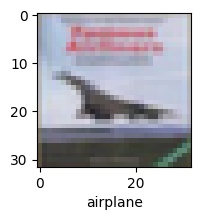

In [65]:
plot_sample(X_test, y_test, 3)

In [66]:
classes[y_classes[3]]

'airplane'

In [67]:
print("Classificatoin Report: \n", classification_report(y_test, y_classes))

Classificatoin Report: 
               precision    recall  f1-score   support

           0       0.69      0.76      0.73      1000
           1       0.79      0.83      0.81      1000
           2       0.60      0.53      0.56      1000
           3       0.59      0.35      0.44      1000
           4       0.61      0.67      0.64      1000
           5       0.59      0.61      0.60      1000
           6       0.63      0.86      0.73      1000
           7       0.82      0.67      0.74      1000
           8       0.79      0.80      0.80      1000
           9       0.75      0.78      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

